In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
img_name = 'lena.png'
img_2d = np.array(img_name)

print(img_name.split('.')[0])

lena


In [3]:
gaussian_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

In [4]:
def limit_value(img_2d):
    return np.clip(img_2d, 0, 255, out=img_2d)

In [7]:
def convolute_2D(img_2d, kernel):
    kernel_size = kernel.shape[0]
    padding = kernel_size // 2
    
    # Initialize new image
    img_size = img_2d.shape
    new_img_2d = np.zeros(img_size).astype('float64')
    
    # Create padding with the edge values
    img_2d = np.pad(img_2d, ((padding, padding), (padding, padding), (0, 0)), 'edge')
    
    # Convolution with np.as_strided and np.einsum
    for (i, j, k) in np.ndindex(new_img_2d.shape):
        new_img_2d[i, j, k] = np.einsum('ij,ij', kernel, img_2d[i:i+kernel_size, j:j+kernel_size, k])
    return limit_value(new_img_2d).astype('uint8')

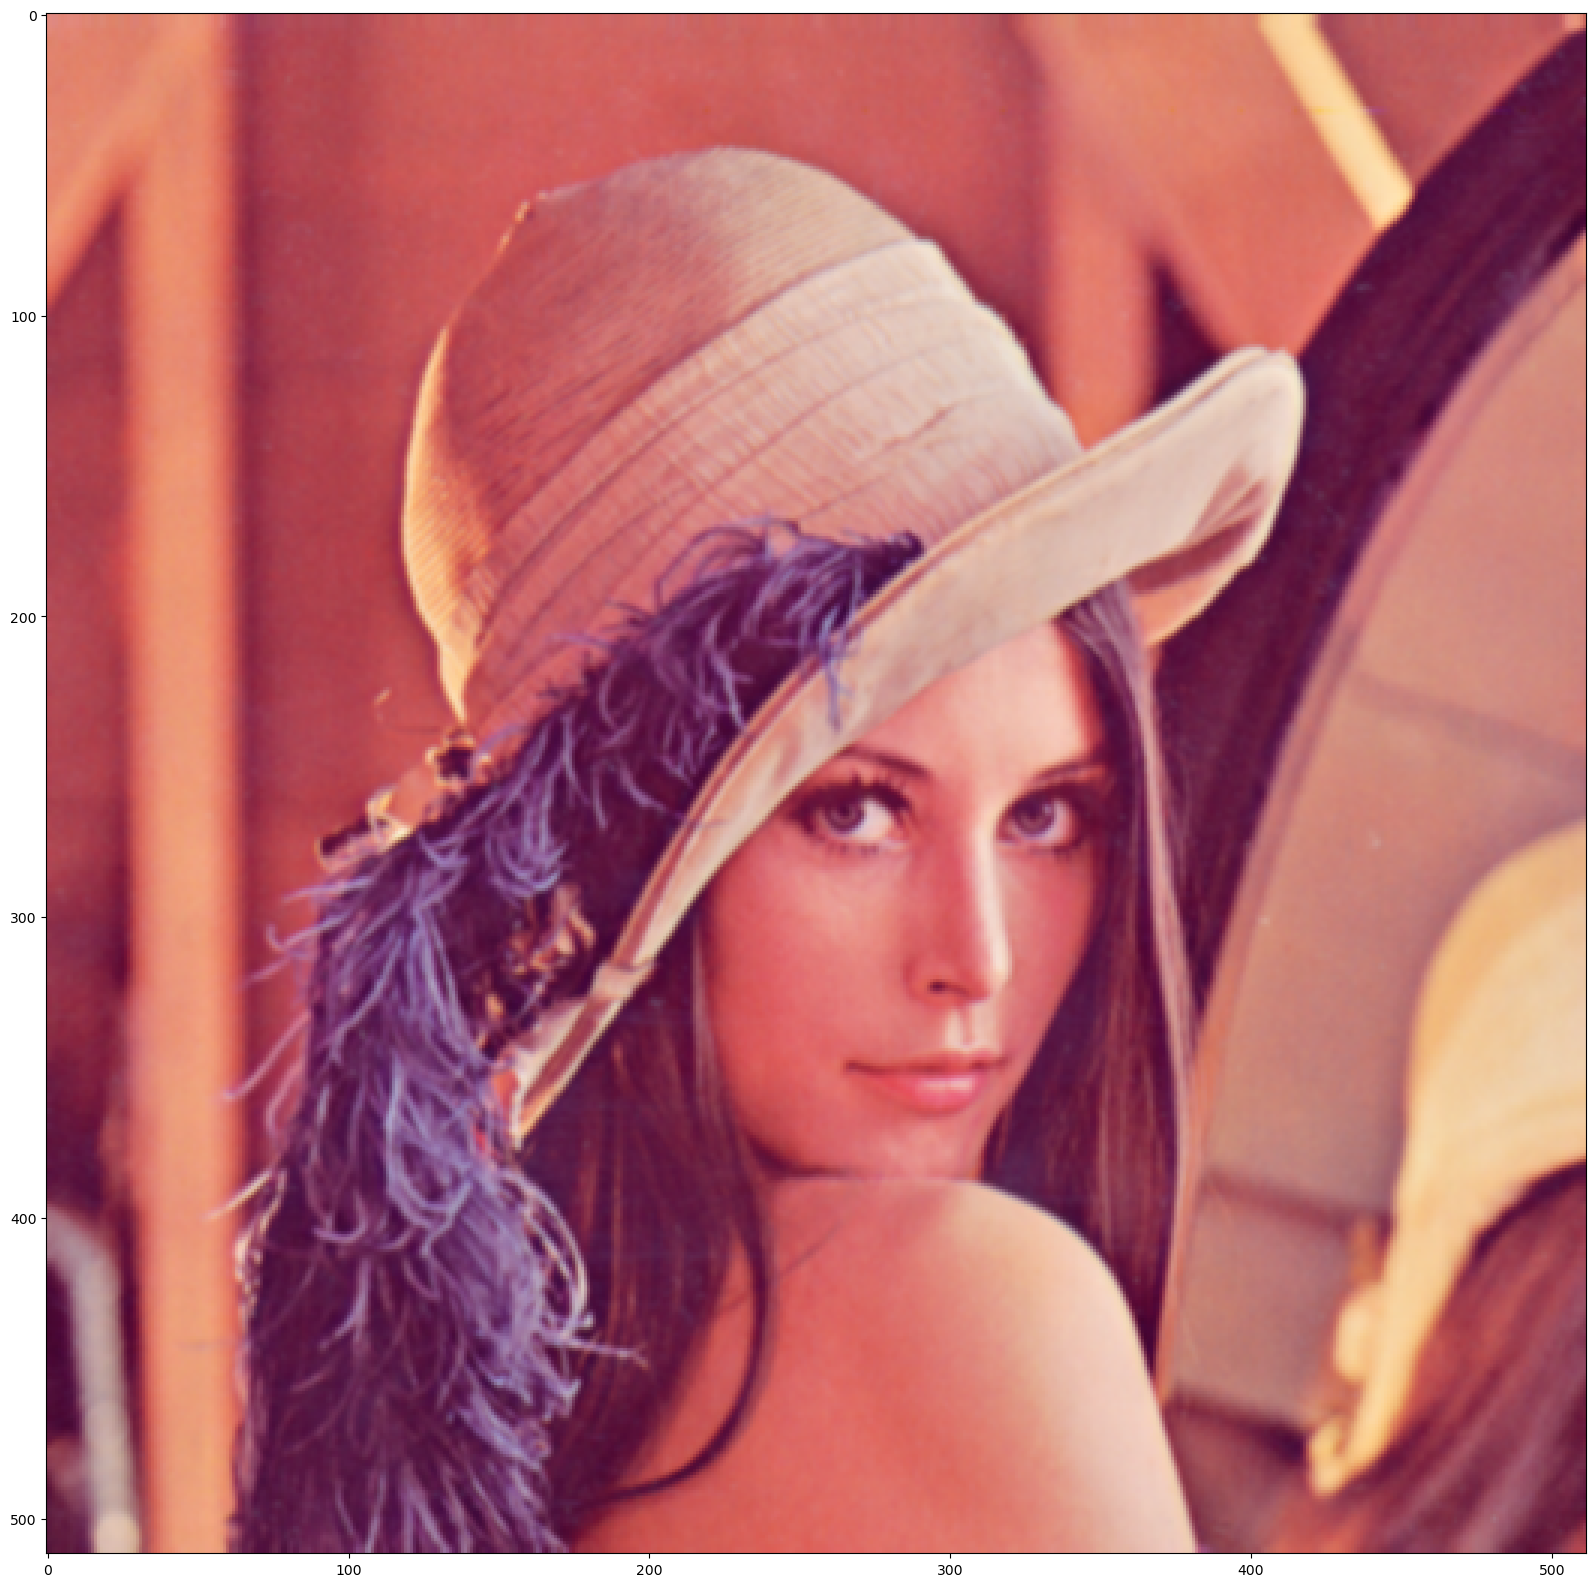

In [8]:
plt.figure(figsize=(20, 20))
plt.imshow(convolute_2D(img_2d, gaussian_kernel))